In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/Users/henrysun_1/Desktop/Duke/2024-2025/Summer 2024/fishics/data/data_for_henry_2024.csv")
data

,station_id,project,date,sampling_bout,gear,sample_grp,station,location,replicate,primers,...,Atl_herring,Atl_cod,Am_gizzard_shad,Fourspine_stickleback,Catfish_sp,White_perch,Whitefish_Cor,Pac_sand_lance,White_catfish,Atl_salmon
0,NJOT_Feb_24_2,NJOT,2/1/24,Feb_24,edna,Trawl,2,B,1,bony,...,0.088030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NJOT_Feb_24_3,NJOT,2/1/24,Feb_24,edna,Trawl,3,B,1,bony,...,0.007672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NJOT_Feb_24_4,NJOT,2/1/24,Feb_24,edna,Trawl,4,B,1,bony,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NJOT_Feb_24_5,NJOT,2/1/24,Feb_24,edna,Trawl,5,B,1,bony,...,0.000117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NJOT_Feb_24_6,NJOT,2/1/24,Feb_24,edna,Trawl,6,B,1,bony,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,NJOT_Aug_23_104,NJOT,8/1/23,Aug_23,edna,Trawl,104,B,1,bony,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,NJOT_Aug_23_106,NJOT,8/1/23,Aug_23,edna,Trawl,106,B,1,bony,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,NJOT_Aug_23_107,NJOT,8/1/23,Aug_23,edna,Trawl,107,B,1,bony,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,NJOT_Aug_23_108,NJOT,8/1/23,Aug_23,edna,Trawl,108,B,1,bony,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


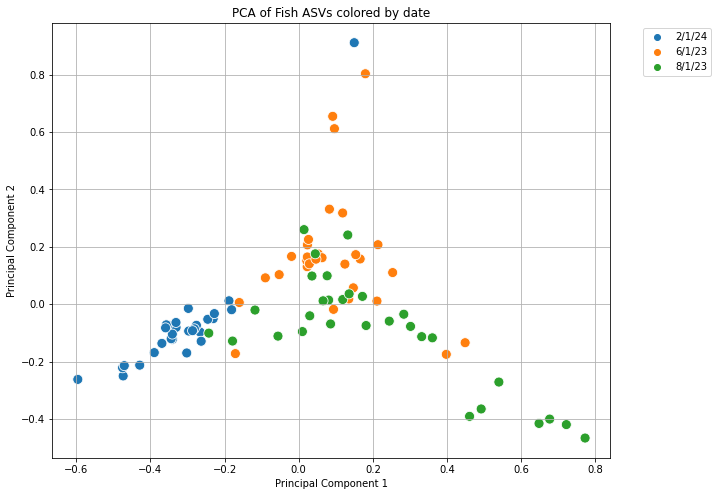

In [3]:
# Extract the relevant columns for PCA (columns L to CH, which are the fish ASVs)
fish_asvs = data.iloc[:, 11:]

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(fish_asvs)

# Add PCA results to the dataframe
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# color by date
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='PCA1', y='PCA2', data=data, hue='date', s=100, palette='tab10')
# plt.title('PCA of Fish ASVs colored by date')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=data, hue='date', s=100, palette='tab10')

# Annotate points with station numbers
# for i, station in enumerate(data['station']):
#     plt.annotate(station, (data['PCA1'].iloc[i], data['PCA2'].iloc[i]), fontsize=8, color='black', ha='right', va='bottom')

plt.title('PCA of Fish ASVs colored by date')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Outlier station 6

Station 6 is an outlier across both plots. Appears to be much more similar to data in the summer
NorSeaRob 0.028368794
Am_butterfish 0.822695035
FourSpot Flounder 0.14893617

In [20]:
data
selected_columns = data[['PCA1', 'PCA2', 'date']]
selected_columns.to_csv('pca_latent_space.csv', index=False)


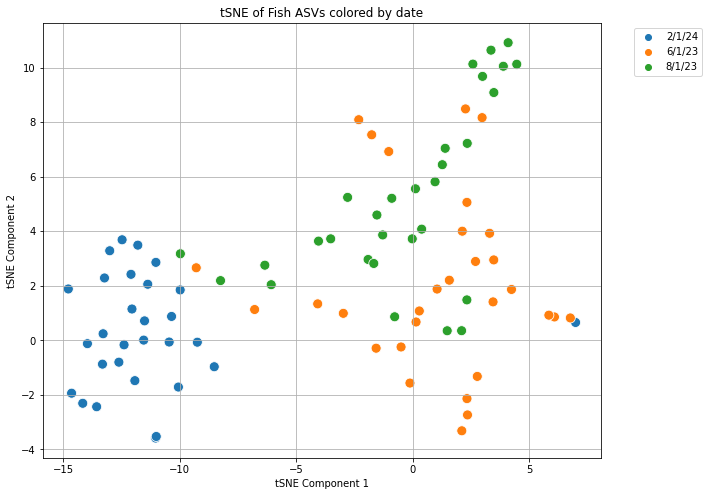

In [11]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=30, perplexity=20, learning_rate=10, n_iter=5000) #test with diff perplexity
tsne_result = tsne.fit_transform(fish_asvs)
# Perform t-SNE

# Add t-SNE results to the dataframe
data['tSNE1'] = tsne_result[:, 0]
data['tSNE2'] = tsne_result[:, 1]

# plt.figure(figsize=(12, 8))
# sns.scatterplot(x='tSNE1', y='tSNE2', data=data, hue='date', s=100, palette='tab10')
# plt.title('t-SNE of Fish ASVs colored by Date')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()


plt.figure(figsize=(10, 8))
sns.scatterplot(x='tSNE1', y='tSNE2', data=data, hue='date', s=100, palette='tab10')

# Annotate points with station numbers
# for i, station in enumerate(data['station']):
#     plt.annotate(station, (data['tSNE1'].iloc[i], data['tSNE2'].iloc[i]), fontsize=8, color='black', ha='right', va='bottom')

plt.title('tSNE of Fish ASVs colored by date')
plt.xlabel('tSNE Component 1')
plt.ylabel('tSNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



In [19]:
data
selected_columns = data[['tSNE1', 'tSNE2', 'date']]
selected_columns.to_csv('tsne_latent_space.csv', index=False)


In [31]:
# Extract species columns
columns_to_remove = ['PCA1', 'PCA2', 'tSNE1', 'tSNE2']
save_data = data.drop(columns=columns_to_remove, errors='ignore')

species_columns = save_data.columns[data.columns.get_loc("primers") + 1:]

# Convert relative abundance to presence/absence (1 if > 0, else 0)
Data_presence = save_data[species_columns].applymap(lambda x: 1 if x > 0 else 0)

# Display the first few rows of the presence/absence data
Data_presence


,category,Atl_croaker_(nibea98),Bay_anchovy,Black_drum_or_Spot,Black_sea_bass,Brd_striped_anchovy,Little_tunny_or_skipjack_tuna,Nor_sea_robin,Scup,Smallmouth_flounder,...,Atl_herring,Atl_cod,Am_gizzard_shad,Fourspine_stickleback,Catfish_sp,White_perch,Whitefish_Cor,Pac_sand_lance,White_catfish,Atl_salmon
0,1,0,1,1,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2,1,0,1,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,1,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
85,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
86,1,1,0,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
87,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from scipy.spatial.distance import pdist, squareform

# Calculate the Jaccard distance matrix
jaccard_dist_matrix = pdist(Data_presence, metric="jaccard")
jaccard_dist_matrix = squareform(jaccard_dist_matrix)

# Display the Jaccard distance matrix
jaccard_dist_matrix


array([[0.        , 0.4375    , 0.46428571, ..., 0.68421053, 0.625     ,
        0.56410256],
       [0.4375    , 0.        , 0.53571429, ..., 0.7027027 , 0.60526316,
        0.57894737],
       [0.46428571, 0.53571429, 0.        , ..., 0.53571429, 0.51612903,
        0.53125   ],
       ...,
       [0.68421053, 0.7027027 , 0.53571429, ..., 0.        , 0.34375   ,
        0.41176471],
       [0.625     , 0.60526316, 0.51612903, ..., 0.34375   , 0.        ,
        0.26470588],
       [0.56410256, 0.57894737, 0.53125   , ..., 0.41176471, 0.26470588,
        0.        ]])

In [32]:
# Export presence/absence data
Data_presence.to_csv("presence_absence_data.csv", index=False)

# Export Jaccard distance matrix
pd.DataFrame(jaccard_dist_matrix).to_csv("jaccard_dist_matrix.csv", index=False)
